*******ANALYZING AMAZON SALES DATA*******

EXTRACT

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('Amazon.csv')


TRANSFORM AND LOAD

In [9]:

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=False, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=False, errors='coerce')

invalid_order_dates = df[df['Order Date'].isna()]['Order Date']
invalid_ship_dates = df[df['Ship Date'].isna()]['Ship Date']

print("Invalid Order Dates:\n", invalid_order_dates)
print("Invalid Ship Dates:\n", invalid_ship_dates)


Invalid Order Dates:
 2    NaT
4    NaT
5    NaT
11   NaT
13   NaT
17   NaT
23   NaT
24   NaT
27   NaT
35   NaT
38   NaT
40   NaT
41   NaT
42   NaT
43   NaT
49   NaT
50   NaT
55   NaT
58   NaT
59   NaT
60   NaT
62   NaT
65   NaT
66   NaT
74   NaT
75   NaT
83   NaT
87   NaT
90   NaT
91   NaT
94   NaT
96   NaT
97   NaT
99   NaT
Name: Order Date, dtype: datetime64[ns]
Invalid Ship Dates:
 2    NaT
3    NaT
4    NaT
10   NaT
12   NaT
15   NaT
19   NaT
21   NaT
23   NaT
24   NaT
25   NaT
26   NaT
27   NaT
29   NaT
33   NaT
36   NaT
38   NaT
42   NaT
43   NaT
53   NaT
56   NaT
57   NaT
60   NaT
61   NaT
66   NaT
67   NaT
75   NaT
78   NaT
79   NaT
81   NaT
82   NaT
83   NaT
84   NaT
91   NaT
95   NaT
98   NaT
Name: Ship Date, dtype: datetime64[ns]


In [10]:

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [11]:

df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Year-Month'] = df['Order Date'].dt.to_period('M')


****ABALYSIS****

In [12]:

monthly_sales = df.groupby('Order Month')['Total Revenue'].sum()


yearly_sales = df.groupby('Order Year')['Total Revenue'].sum()


year_monthly_sales = df.groupby('Year-Month')['Total Revenue'].sum()


******PLOTTING THE RESULT******

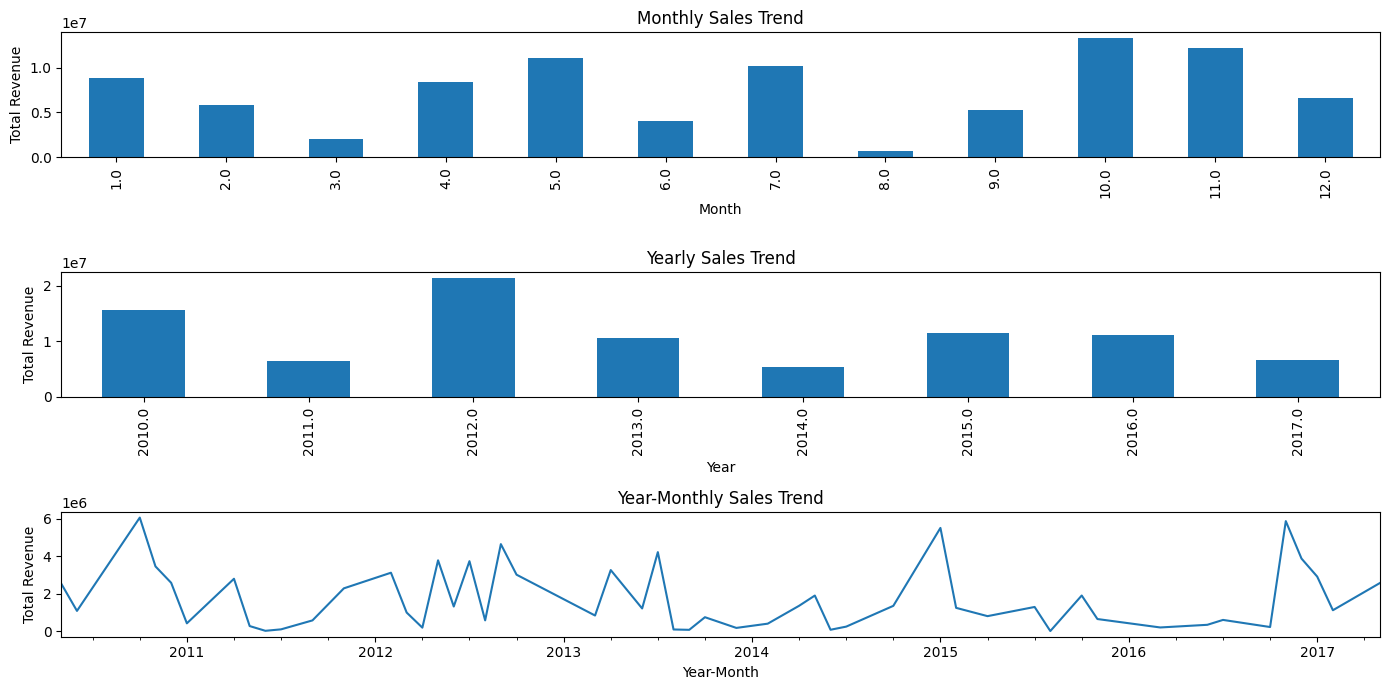

In [13]:

plt.figure(figsize=(14, 7))


plt.subplot(3, 1, 1)
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')


plt.subplot(3, 1, 2)
yearly_sales.plot(kind='bar')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')


plt.subplot(3, 1, 3)
year_monthly_sales.plot(kind='line')
plt.title('Year-Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')

plt.tight_layout()
plt.show()


******KEY METRIC AND RELATIONSHIP******

In [14]:

correlation = df['Units Sold'].corr(df['Total Revenue'])
print(f"Correlation between Units Sold and Total Revenue: {correlation}")


Correlation between Units Sold and Total Revenue: 0.4477844902616836


In [15]:

region_profit_pivot = df.pivot_table(values='Total Profit', index='Region', aggfunc='sum')
print(region_profit_pivot)


                                   Total Profit
Region                                         
Asia                                 6113845.87
Australia and Oceania                4722160.03
Central America and the Caribbean    2846907.85
Europe                              11082938.63
Middle East and North Africa         5761191.86
North America                        1457942.76
Sub-Saharan Africa                  12183211.40
